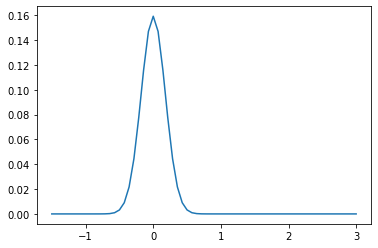

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from qiskit.circuit.library import NormalDistribution
from math import pi
from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

#Preparing the sine-shaped histogram that will be used in the initialisation


x = np.linspace(-1.5,3, num=64)
storage_for_normalisation = []

Normalisation_wavefunction = (1/(np.sqrt(2*np.pi)*2*0.4)*np.exp(-(0.5*x**2)/(2*0.016)))

Normalisation_Constant = np.sum(Normalisation_wavefunction)

waveFunction = (Normalisation_wavefunction)/(Normalisation_Constant)


plt.plot(x,waveFunction)
plt.show()

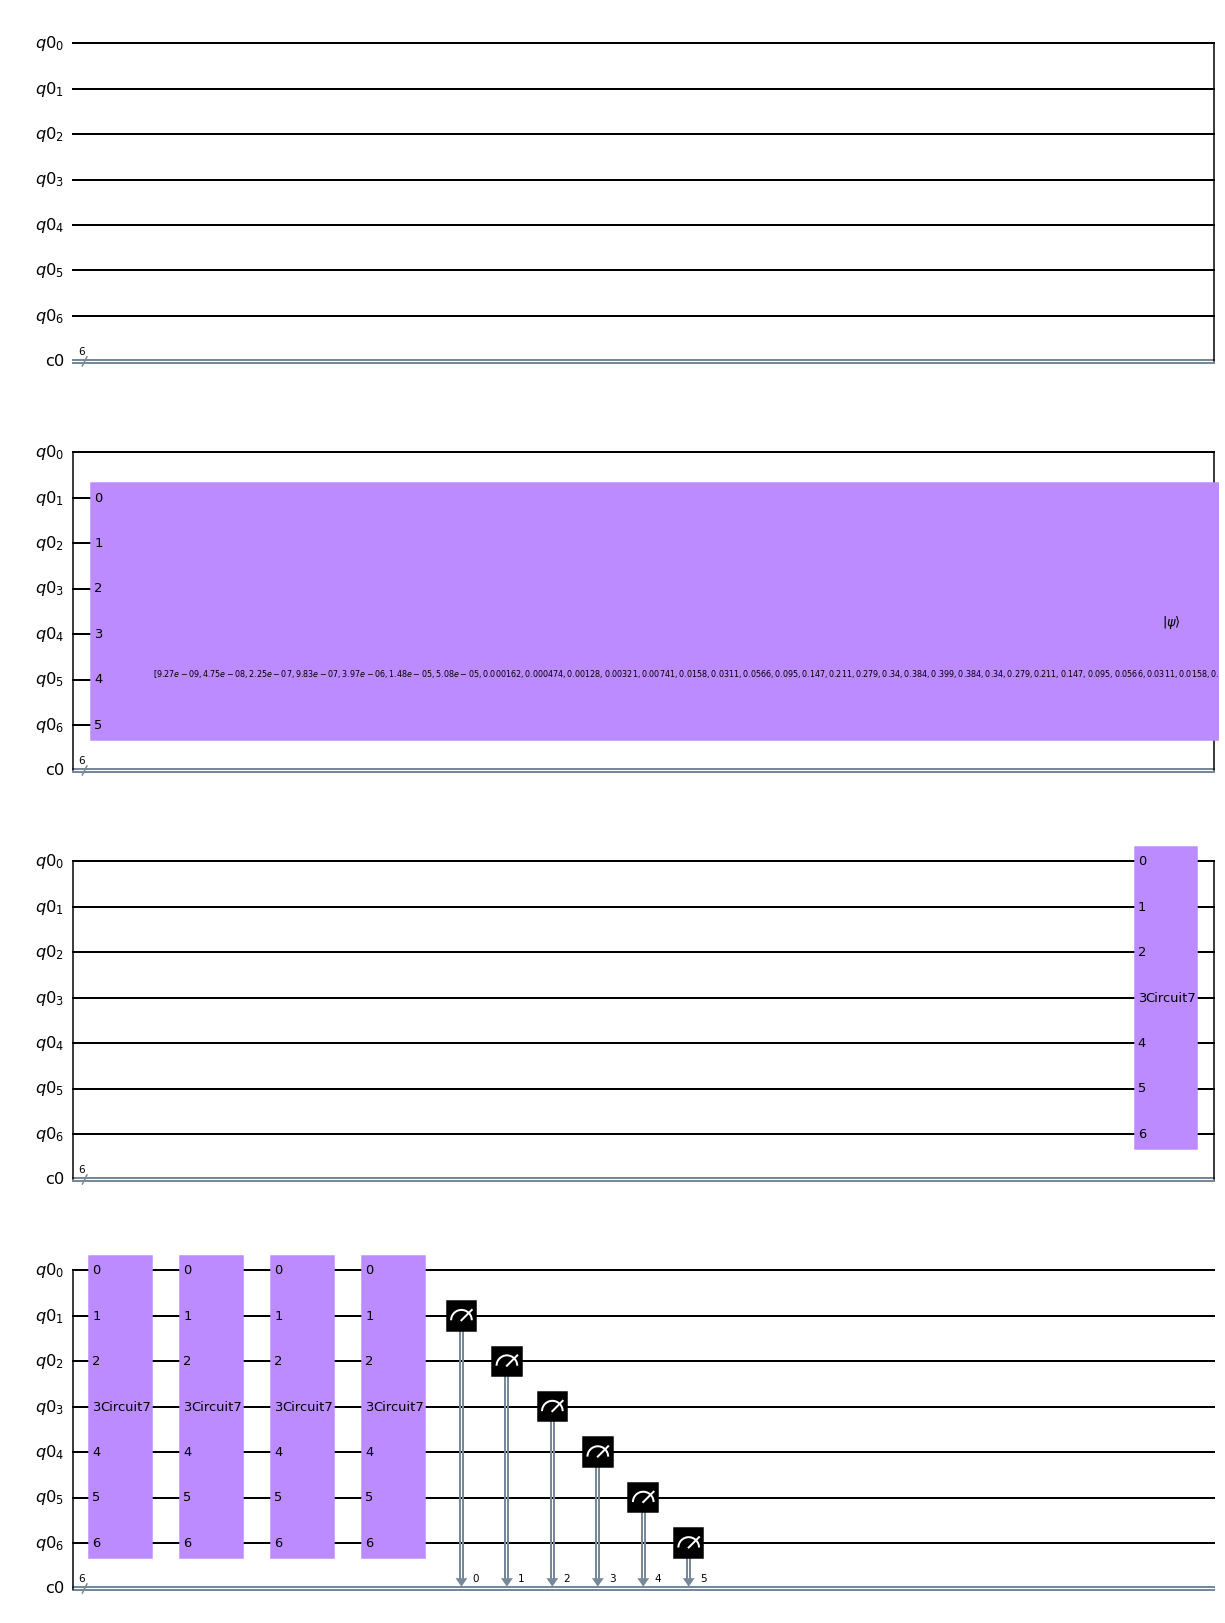

In [2]:


#n = 6 #number of qubits not including ancilla
phi = 0.1
V = 1



qb = 6  #Number of active qubits. Not including Ancilla
cbits = 6

q = QuantumRegister(qb + 1)
c = ClassicalRegister(cbits)
qc = QuantumCircuit(q)

qc2 = QuantumCircuit(q,c)

#Initialisation


##############################################  INITILIZATION    ###################################################################


qc2.initialize(np.sqrt(waveFunction), [q[1],q[2],q[3],q[4],q[5],q[6]])





########################################### POTENTIAL   ############################################################################


qc.p(V*phi,qb)






#########################################  QUANTUM FOURIER TRANSFORM ###################################


def QFT(qubits):
    for i in range(qubits):
        qc.h(i+1)
        for j in range(qubits - 1 - i):
            qc.cp(pi/(2**(j+1)), i+2+j, i+1)

            
QFT(qb)




qc.x(qb)
    
#for k in range(qb):
#    qc.measure(k+1,k)



   #Centering the Momentum

###############################################  TIME STEP  ##############################################################





def Time_Evolution(qubits):
    for i in range (qubits):
        qc.p(phi/(2**(i+qubits-3)), qubits-i)
    for i in range (qubits):
        for j in range (i+1,qubits):
            qc.cx(qubits-j, 0)
            qc.cx(qubits-i, 0)
            qc.p(phi* (2**(2-i-j)), 0) #2-i-j or 4?
            qc.cx(qubits-i, 0)
            qc.cx(qubits-j, 0)
    
    
Time_Evolution(qb)




###############################################  Inverse QFT   ####################################################
#qc.x(qb)


qc.x(qb)







def QFT_Inv(qubits):
    for i in reversed(range(qubits)):
        for j in range(qubits - 1 - i):
            qc.cp(-pi/(2**(j+1)), i+2+j, i+1)
        qc.h(i+1)
        

    
    
QFT_Inv(qb)



totqc = qc.to_gate()



for i in range(5):
    qc2.append(qc, [0,1,2,3,4,5,6])



#Measurement


for k in range(qb):
    qc2.measure(k+1,k)



qc2.draw('mpl')


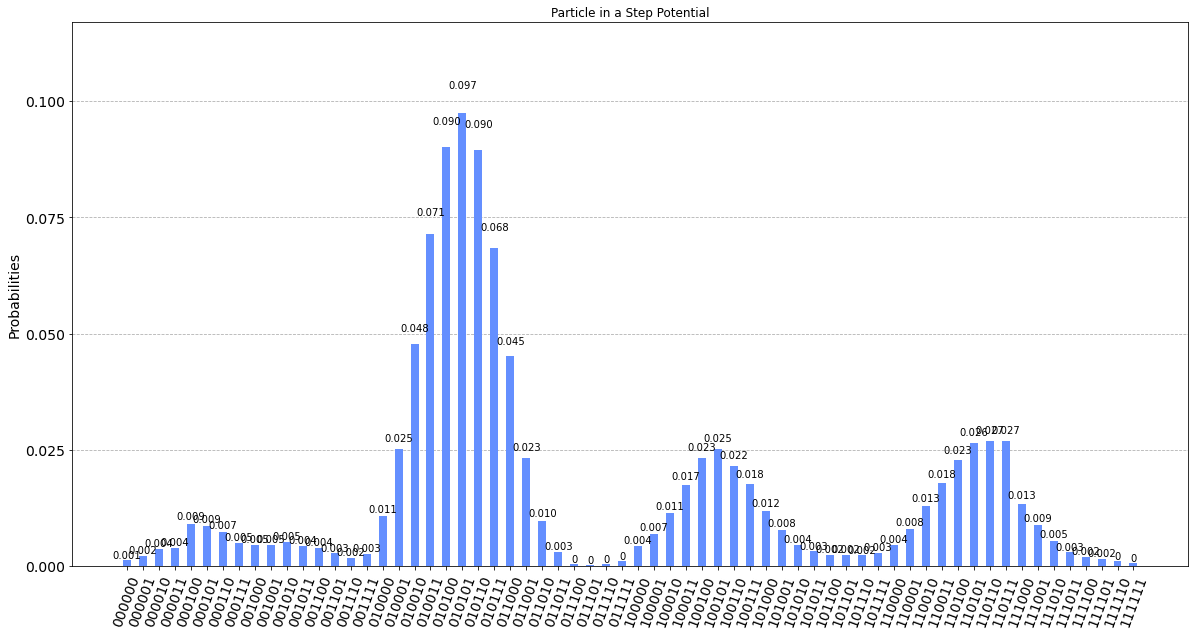

In [3]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 65536
results = execute(qc2, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer, title = "Particle in a Step Potential", figsize = [20,10])

In [4]:
from qiskit import IBMQ
IBMQ.load_account()

C:\Users\MohamedAbouelela\anaconda3\envs\quantumThesis\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
#On the Quantum Computer


provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc2, backend=qcomp, shots=8192)

from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job is queued (48)    

In [ ]:
print(job.result())

result = job.result()
plot_histogram(result.get_counts(qc2))